# Data Preparation

Once data has been loaded and some initial cleaning is done, it is often necessary to perform several addition rounds of data preparation.  This can include scaling data, removing outliers, re-encoding variables, and imputing missing data.  We'll cover these aspects below.

## Scaling Data

Many machine learning algorithms, such as k-means clustering and support vector machines, use distance metrics like Euclidean distance to compare points in the feature space. Features with large numeric ranges can dominate the distance computation, thereby affecting the algorithm's performance. Similarly, optimization algorithms like gradient descent converge more quickly when features are on similar scales.

### Working Example - Impact of Scaling on K-Means Clustering

Let's consider a simple synthetic dataset with two features `X1` and `X2`, where `X1` has values ranging between 0 and 10, but are separated into two groups along the axis. `X2` ranges from 0 to 1000, and so dominates the distance function. We'll cluster the data using k-means before and after scaling to see the difference.


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


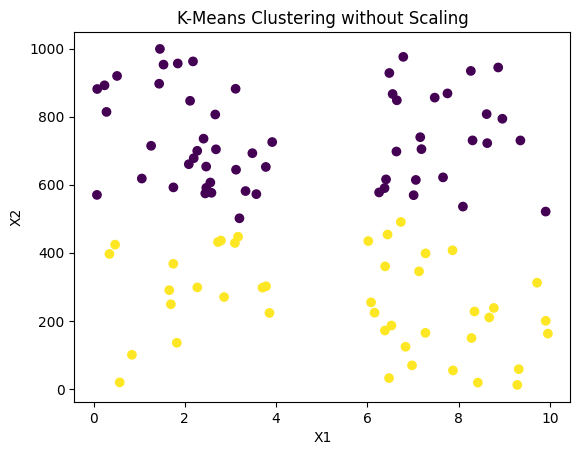

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


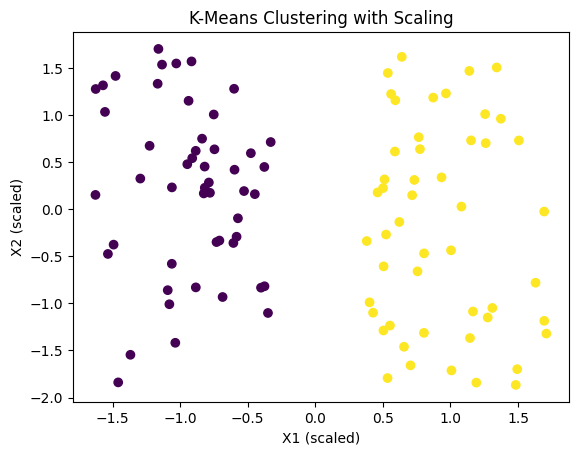

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X1a = np.random.uniform(0, 4, 50)
X1b = np.random.uniform(6, 10, 50)
X1 = np.concatenate([X1a,X1b])
X2 = np.random.uniform(0, 1000, 100)
X = np.column_stack((X1, X2))

# Cluster without scaling
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering without Scaling')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster after scaling
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering with Scaling')
plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.show()


### How to scale

Not all distributions are created equal!  It is important to examine your distributions before scaling parameters, or else your scaling efforts might not yield any improvements.

Two common types of distributions are normal and power-law (heavy-tailed) distributions.  These are easy to recognize by plotting histograms.

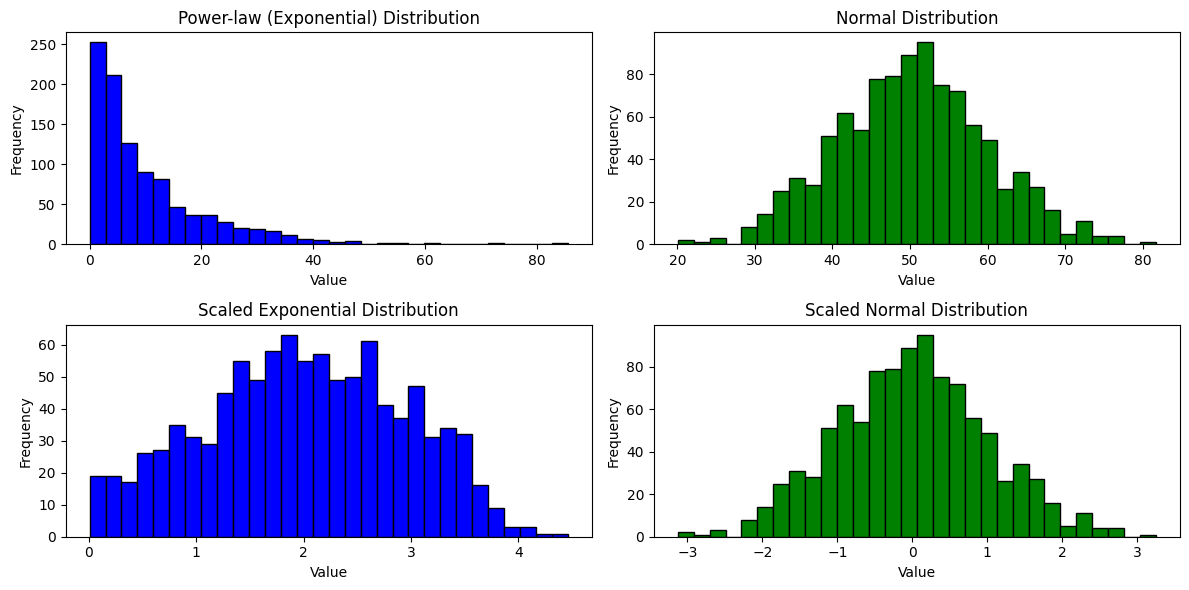

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
n_samples = 1000

# Power-law (exponential) distribution
power_law_data = np.random.exponential(scale=10, size=n_samples)

# Scaled
scaled_power_law = np.log1p(power_law_data)

# Normal distribution
normal_data = np.random.normal(loc=50, scale=10, size=n_samples)
normal_data_2D = normal_data.reshape(-1, 1)

# Apply scaling
scaler = StandardScaler()
scaled_normal_data_2D = scaler.fit_transform(normal_data_2D)

# Convert back to 1D array
scaled_normal_data = scaled_normal_data_2D.ravel()


# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Plot power-law distribution
axes[0,0].hist(power_law_data, bins=30, color='blue', edgecolor='black')
axes[0,0].set_title("Power-law (Exponential) Distribution")
axes[0,0].set_xlabel("Value")
axes[0,0].set_ylabel("Frequency")

# Plot scaled power-law distribution
axes[1,0].hist(scaled_power_law, bins=30, color='blue', edgecolor='black')
axes[1,0].set_title("Scaled Exponential Distribution")
axes[1,0].set_xlabel("Value")
axes[1,0].set_ylabel("Frequency")

# Plot normal distribution
axes[0,1].hist(normal_data, bins=30, color='green', edgecolor='black')
axes[0,1].set_title("Normal Distribution")
axes[0,1].set_xlabel("Value")
axes[0,1].set_ylabel("Frequency")

# Plot scaled normal distribution
axes[1,1].hist(scaled_normal_data, bins=30, color='green', edgecolor='black')
axes[1,1].set_title("Scaled Normal Distribution")
axes[1,1].set_xlabel("Value")
axes[1,1].set_ylabel("Frequency")



plt.tight_layout()
plt.show()




- **Z-scaling**: Use it when the feature roughly follows a normal distribution or when you don't have information about the distribution. It transforms the data into a distribution with a mean of 0 and a standard deviation of 1.
  
- **Log-Scaling**: It is useful for features that follow a power-law distribution. In these cases, log-scaling can help equalize the ranges and variances across features.


## Scaling in sklearn

Scikit-Learn provides several tools for scaling data, each with its own use cases and characteristics. All scaling tools follow the transformer API, meaning that they offer `fit`, `transform`, and `fit_transform` methods. Here's a brief overview to the most commonly used scaling methods available in Scikit-Learn:

### 1. StandardScaler
- **What It Does**: Standardizes features by removing the mean and scaling to unit variance. This results in a distribution with a standard deviation of 1.
- **Use Case**: When you need features to have a mean of 0 and a standard deviation of 1. Ideal for algorithms that assume features are normally distributed.

### 2. MinMaxScaler
- **What It Does**: Scales each feature to a given range, typically between 0 and 1. The transformation is given by: `(X - X.min()) / (X.max() - X.min())`.
- **Use Case**: When you need to scale features to a specific range. It’s sensitive to outliers, so if outliers are present, consider using RobustScaler.

### 3. RobustScaler
- **What It Does**: Scales features using statistics that are robust to outliers. It removes the median and scales the data according to the interquartile range.
- **Use Case**: When your data contains outliers and you want to reduce their influence. However, note that outliers themselves are not removed.

### 4. Normalizer
- **What It Does**: Normalizes samples (not features) individually to unit norm (vector length).
- **Use Case**: This is useful for sparse datasets (lots of zeros) with features of varying scales when using algorithms that are sensitive to the size of feature vectors, like k-NN or SVMs.

### Example of Using StandardScaler:

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)
```

### Important Points:
- **Fit vs Transform**: The `fit` method computes the necessary statistics (mean, standard deviation, etc.), and `transform` applies the scaling. `fit_transform` does both steps together.
- **Scaling Train and Test Data**: Always fit the scaler on your training data and then transform both your training and test data to avoid data leakage.
- **Inverse Transformation**: Most scalers in Scikit-Learn offer an `inverse_transform` method to revert the data back to its original scale, which can be useful for interpretation or further processing.
